In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("LGD_DATA.csv")

In [4]:
print(df.info())
print('\n',df.isnull().sum())
print('\n',df.describe())
print('\n',df.columns)
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15290 entries, 0 to 15289
Data columns (total 7 columns):
Ac_No                  15290 non-null int64
Age                    15290 non-null int64
Years of Experience    15290 non-null int64
Number of Vehicles     15290 non-null int64
Gender                 15290 non-null object
Married                15290 non-null object
Losses in Thousands    15290 non-null float64
dtypes: float64(1), int64(4), object(2)
memory usage: 836.2+ KB
None

 Ac_No                  0
Age                    0
Years of Experience    0
Number of Vehicles     0
Gender                 0
Married                0
Losses in Thousands    0
dtype: int64

                Ac_No           Age  Years of Experience  Number of Vehicles  \
count   15290.000000  15290.000000         15290.000000        15290.000000   
mean   149961.789339     42.328254            23.732897            2.495880   
std     28947.841061     18.280511            17.850707            0.953776   
min

,Ac_No,Age,Years of Experience,Number of Vehicles,Gender,Married,Losses in Thousands
0,150024,24,5,1,M,Married,203.319595
1,144880,31,10,1,F,Single,402.197302
2,133742,56,37,1,M,Married,553.132096
3,151282,52,31,1,F,Married,292.430579
4,174407,20,3,1,M,Single,246.540576


In [5]:
# no missing values

In [6]:
df.corr()

,Ac_No,Age,Years of Experience,Number of Vehicles,Losses in Thousands
Ac_No,1.000000,0.008291,0.008437,-0.003056,-0.000794
Age,0.008291,1.000000,0.997161,0.008366,-0.442962
Years of Experience,0.008437,0.997161,1.000000,0.008545,-0.442115
Number of Vehicles,-0.003056,0.008366,0.008545,1.000000,-0.011553
Losses in Thousands,-0.000794,-0.442962,-0.442115,-0.011553,1.000000


In [9]:
#Ac_no & Number of Vehicles are not much related with Losses
#Age & Experience are highly co-related so one column has to be omitted

In [10]:
df.columns=['Acc_no','Age','Years_of_experience','Number_of_vehicles','Gender','Married','Loss_in_thousands']
df.columns

Index(['Acc_no', 'Age', 'Years_of_experience', 'Number_of_vehicles', 'Gender',
       'Married', 'Loss_in_thousands'],
      dtype='object')

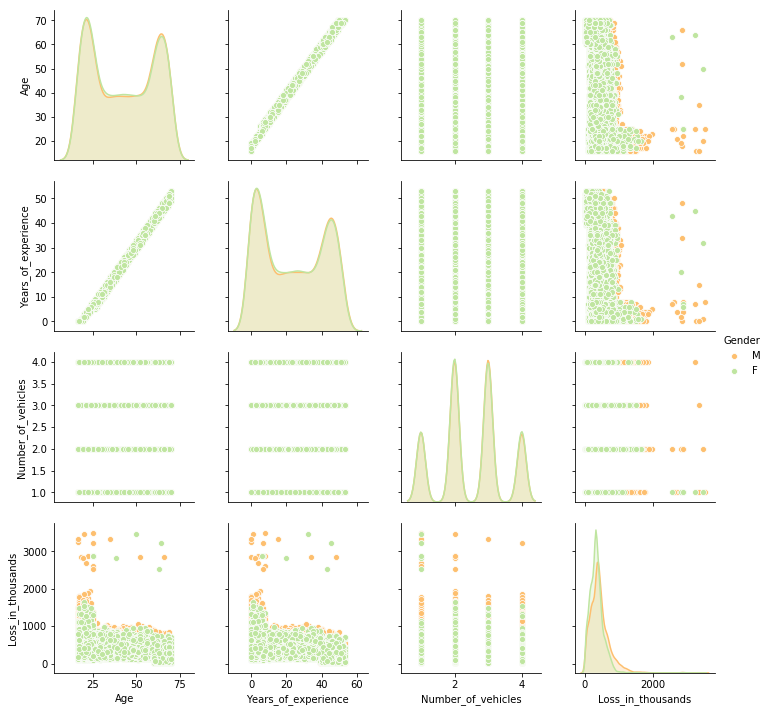

In [11]:
sns.pairplot(df,hue='Gender',palette='Spectral',
             vars=['Age','Years_of_experience','Number_of_vehicles','Loss_in_thousands'])

In [12]:
#here also we see the linear relation b/w Age & Experience
#another thing we can observe is young males i.e. age<20 are causing higher losses

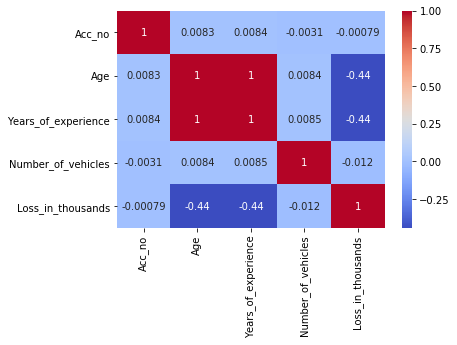

In [13]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm') #Age is an important variable

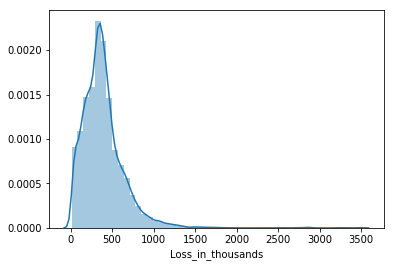

In [14]:
sns.distplot(df['Loss_in_thousands'])

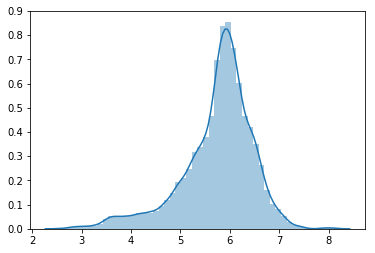

In [15]:
sns.distplot(list(map(math.log,df['Loss_in_thousands'])),bins=50)
#to normalize variable from right skewed

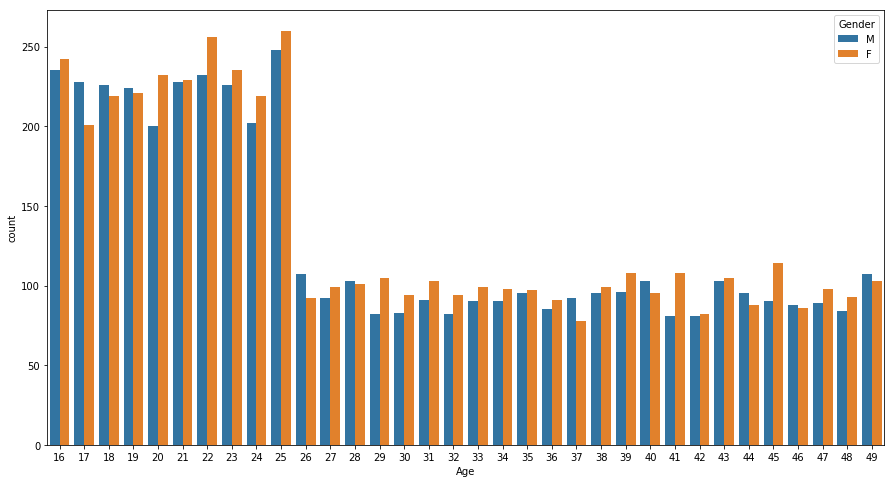

In [28]:
plt.figure(figsize=(15,8))
sns.countplot(x=df['Age'][df.Age<50],hue='Gender',data=df)

In [19]:
#proportion of males and females are almost same
#number of customers are much more whose age are below 26

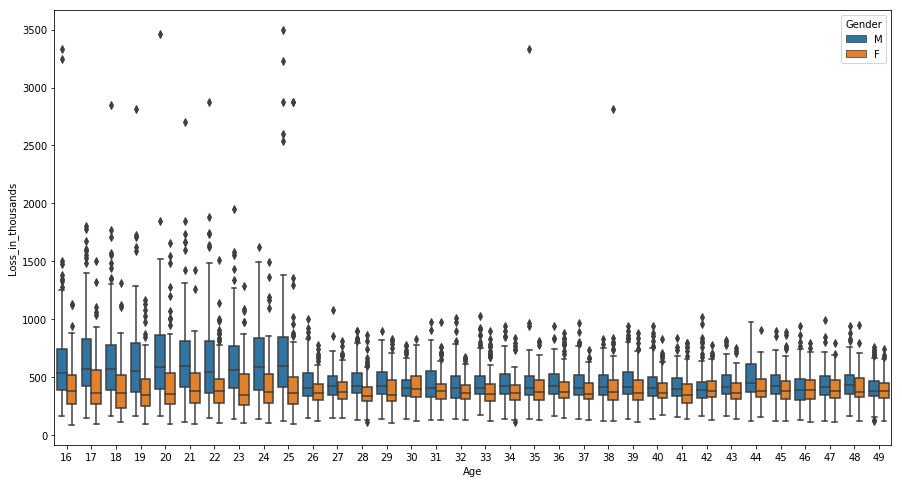

In [27]:
plt.figure(figsize=(15,8))
sns.boxplot(x=df['Age'][(df.Age<50)],y='Loss_in_thousands',data=df,hue='Gender')

In [17]:
#on an average, males are causing more losses than females
#among them, customers of age below 26 are resulting in higher losses.

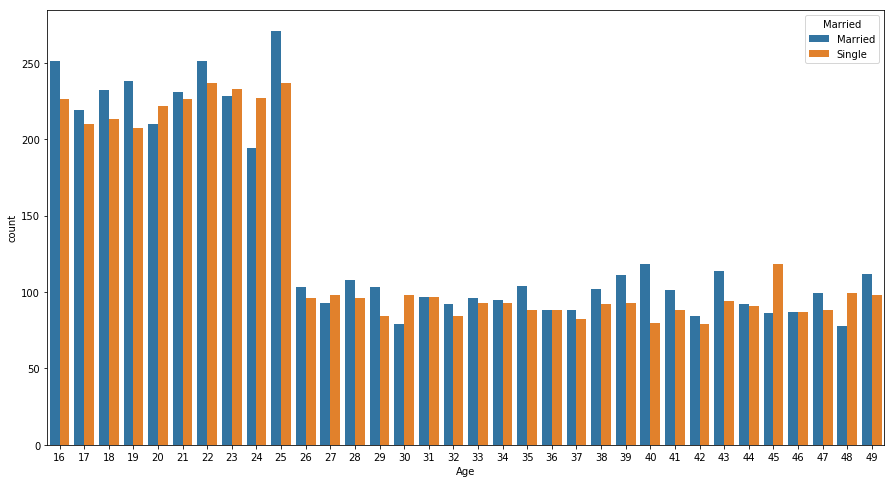

In [30]:
plt.figure(figsize=(15,8))
sns.countplot(x=df['Age'][df.Age<50],hue='Married',data=df)

In [ ]:
#surprisingly, proportion of married people are much high even when age is below 20

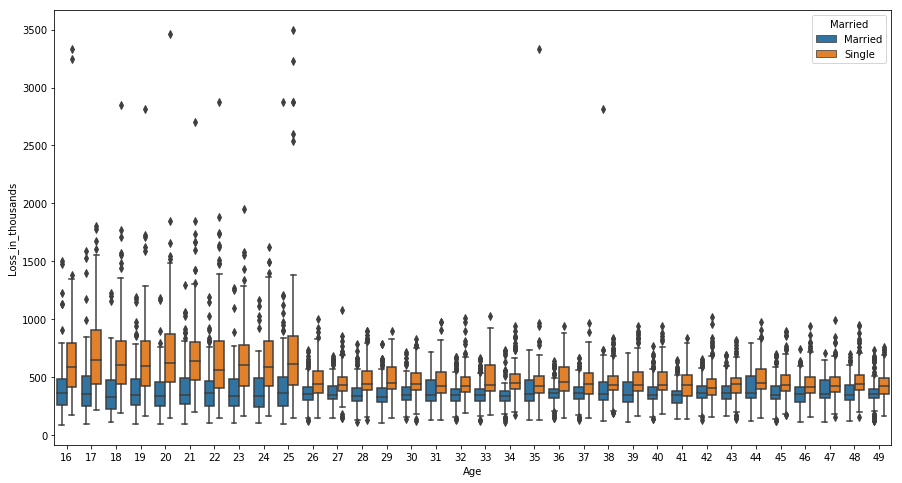

In [32]:
plt.figure(figsize=(15,8))
sns.boxplot(x=df['Age'][(df.Age<50)],y='Loss_in_thousands',data=df,hue='Married')

In [33]:
#married people performs more responsibly than single one's 
#while single people below age of 26 performing very poorly even when their proportion is much less than the married

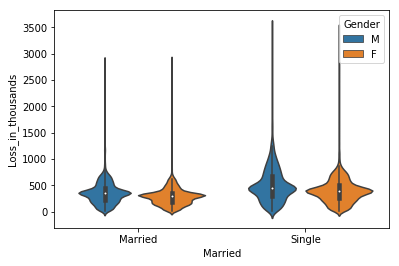

In [34]:
sns.violinplot(x='Married',y='Loss_in_thousands',data=df,hue='Gender')

In [ ]:
#Single males are causing more loss among others

In [75]:
dummyvar1=pd.get_dummies(df.Gender,drop_first=True)
dummyvar2=pd.get_dummies(df.Married,drop_first=True)
df_new=pd.concat([df.drop(['Married','Gender'],axis=1),dummyvar1,dummyvar2],axis=1)
#normalizing the Loss_in_thousands variable
df_new['Log_of_loss']=list(map(math.log,df.Loss_in_thousands))
df_new.drop(['Loss_in_thousands'],axis=1,inplace=True)
df_new.head()

,Acc_no,Age,Years_of_experience,Number_of_vehicles,M,Single,Log_of_loss
0,150024,24,5,1,1,0,5.314779
1,144880,31,10,1,0,1,5.996943
2,133742,56,37,1,1,0,6.315597
3,151282,52,31,1,0,0,5.678227
4,174407,20,3,1,1,1,5.507527


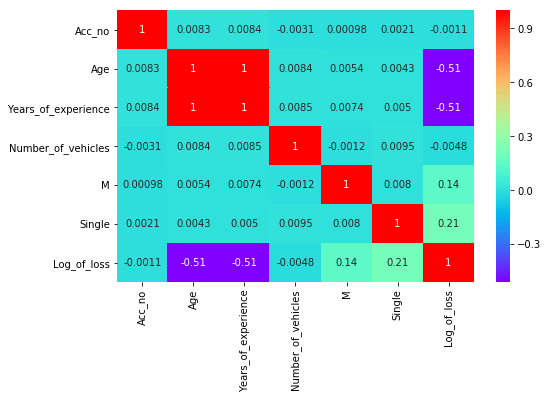

In [76]:
plt.figure(figsize=(8,5))
sns.heatmap(df_new.corr(),annot=True,cmap='rainbow')

Linear Reg Model

In [38]:
from sklearn.model_selection import train_test_split
X=df_new[['Age','Number_of_vehicles','M','Single']]
y=df_new.Log_of_loss
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [39]:
print(X_train.shape)
print(X_test.shape)

(10703, 4)
(4587, 4)


In [42]:
from sklearn.linear_model import LinearRegression
Lin_reg=LinearRegression(normalize=True)
Lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [43]:
print(Lin_reg.intercept_)
print(Lin_reg.coef_)

6.348800034365884
[-0.02044543  0.00071645  0.21452345  0.31707863]


In [44]:
# loss in thousand = 6.3488 - 0.02(Age) + 0.00071(Number of vehicles) + 0.2145(Male) + 0.31707(Single)

In [45]:
#performance on training data
y_train_pred=Lin_reg.predict(X_train)
from sklearn import metrics
print('R2 Score: ',metrics.r2_score(y_train,y_train_pred))
print('MAPE is ',abs((y_train-y_train_pred)/y_train).mean()*100)

R2 Score:  0.3254675688563612
MAPE is  8.81201406194201


In [46]:
#performance on testing data
y_pred=Lin_reg.predict(X_test)
print('R2 Score: ',metrics.r2_score(y_test,y_pred))
print('MAPE is ',abs((y_test-y_pred)/y_test).mean()*100)

R2 Score:  0.32516938297820974
MAPE is  8.719115120389416


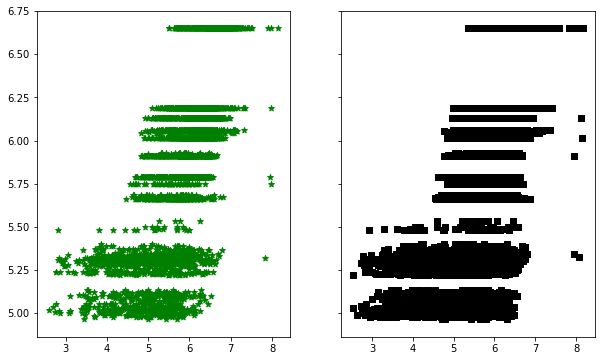

In [73]:
fig, ax=plt.subplots(1,2, sharey=True,figsize=(10,6))
ax[0].scatter(y_test,y_pred,marker='*',c='g')
ax[1].scatter(y_train,y_train_pred,marker='s',c='black')

In [49]:
#not following heteroskedasticity

Random Forest Classifier Model

In [58]:
from sklearn.ensemble import RandomForestRegressor
Rfr=RandomForestRegressor(n_estimators=300, max_depth=2, random_state=10)

In [59]:
Rfr.fit(X_train,y_train)
Rfr.feature_importances_

array([8.78936495e-01, 0.00000000e+00, 1.09880134e-04, 1.20953625e-01])

In [60]:
#performance on training data
y_train_pred=Rfr.predict(X_train)
print('R2 Score: ',metrics.r2_score(y_train,y_train_pred))
print('MAPE is ',abs((y_train-y_train_pred)/y_train).mean()*100)

R2 Score:  0.3939895861209878
MAPE is  8.160650926733586


In [62]:
#performance on testing data
y_pred=Rfr.predict(X_test)
print('R2 Score: ',metrics.r2_score(y_test,y_pred))
print('MAPE is ',abs((y_test-y_pred)/y_test).mean()*100)

R2 Score:  0.4088502010917898
MAPE is  7.986394319841543


In [65]:
#performed better than Linear regression model

In [63]:
from sklearn.model_selection import cross_val_score
depth_=[]
for i in range(2,7):
    Rfr_=RandomForestRegressor(n_estimators=300, max_depth=i, random_state=10)
    score_=cross_val_score(estimator=Rfr_,X=X_train,y=y_train,cv=5)
    depth_.append((i,score_.mean()))
print(depth_)

[(2, 0.3925840654364323), (3, 0.4190010921132372), (4, 0.4367095000447062), (5, 0.43399919554958444), (6, 0.4300870119494439)]


In [64]:
#max depth = 4 is best parameter
Rfr_new=RandomForestRegressor(n_estimators=300, max_depth=4, random_state=10)
Rfr_new.fit(X_train,y_train)
Rfr_new.feature_importances_

array([0.71289202, 0.00412316, 0.10710514, 0.17587968])

In [66]:
#performance on training data
y_train_pred=Rfr_new.predict(X_train)
print('R2 Score: ',metrics.r2_score(y_train,y_train_pred))
print('MAPE is ',abs((y_train-y_train_pred)/y_train).mean()*100)

R2 Score:  0.4302782824263265
MAPE is  7.791985950257355


In [68]:
#performance on testing data
y_pred=Rfr_new.predict(X_test)
print('R2 Score: ',metrics.r2_score(y_test,y_pred))
print('MAPE is ',abs((y_test-y_pred)/y_test).mean()*100)

R2 Score:  0.4315319609391588
MAPE is  7.678373612262043


In [ ]:
#performance is further improved

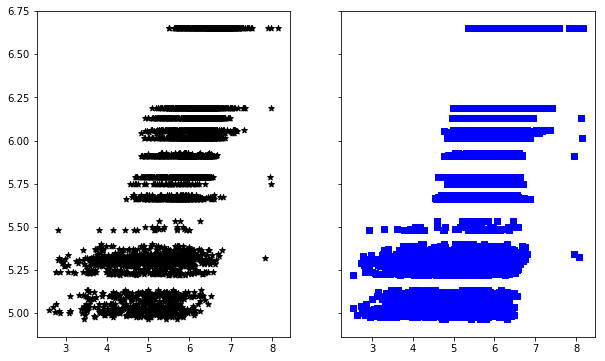

In [69]:
fig, ax=plt.subplots(1,2, sharey=True,figsize=(10,6))
ax[0].scatter(y_test,y_pred,marker='*',c='black')
ax[1].scatter(y_train,y_train_pred,marker='s',c='blue')

In [70]:
#not following heteroskedasticity